<a href="https://colab.research.google.com/github/sohelshekhatik1998/DATATHON-/blob/main/Copy_of_hacthon_ml_and_nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data handling and processing
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats
import statsmodels.api as sm
from scipy.stats import randint as sp_randint
from time import time

# NLP
import nltk
nltk.download('wordnet')
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
!pip install dabl

import dabl
import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Machine Learning with text data
Can it be predicted whether or not a customer would recommend a purchased item of tractor based on solely their written review?
In this, my first Machine Learning project working with text data and applying Natural Language Processing (NLP) techniques, I will aim to predict with words alone whether or not a customer would recommend a purchased type of tractor. Other interesting questions within this kernel include: Which emotive words are most popular? Which aspect of the product is most important - the fit, colour, texture, price? And morever, what would such information mean for a retailer looking to best align their strategy to market demand? I'm not sure about you, but that's enough to spike my interest! There are 23,000 reviews and a binary target variable for overall product recommendation - let's crack on.

# First up, I'll import every library that will be used in this project is imported at the start.

In [ ]:
url='https://github.com/sohelshekhatik1998/DATATHON-/blob/main/TRACTOR%20RENAME%20DATA.xlsx?raw=true'
data = pd.read_excel(url)
data.head()

,Project Type,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Failure Date,Problem Definition (Step-1),Observations (Step-2),System,Sub System,Under Analysis (Step-3),...,Date of ORC Creation,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7,Time to Solution Release (days),Time to Close the ORC (days),Remarks
0,Regular,4,Non Warrantable,Track,27-Dec-2020 17:49,feed pump is fouling with Hood,feed pump is fouling with Hood,Engine,NaN,The Feed Pump position is not changed with res...,...,30-Dec-2020 17:49,30-Dec-2020 17:50,31-Dec-2020 13:11,13-Jan-2021 16:23,19-Jan-2021 21:06,NaN,04-Feb-2021 14:48,20.0,36.0,Based on COE remarks Orc has been Closed
1,Regular,5,Non Warrantable,Build,16-04-2021 12:00:00 AM,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",NaN,Hydraulic,HYDRAULIC LINES-FD0310,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,...,17-May-2021 23:42,18-May-2021 02:10,19-May-2021 13:00,28-May-2021 09:43,31-May-2021 11:48,17-Jun-2021 09:02,NaN,14.0,NaN,As per COE comment hose length corrected in dr...
2,Regular,5,Warrantable,Track,27-Dec-2020 18:30,Oil leakage observed from brake drum drain plu...,Oil leakage Observed From Brake Drum Drain Plu...,Transmission,OIL IMMERSED BRAKE-FD0210,"There is no change in brake drum,brake assly,d...",...,28-Dec-2020 18:31,28-Dec-2020 18:31,31-Dec-2020 13:18,13-Jan-2021 12:56,18-Jan-2021 10:45,NaN,23-Jan-2021 02:29,21.0,26.0,Based on COE Remarks Orc has been closed - Car...
3,Regular,6,NaN,Track,23-Jan-2021 13:17,Battery tray base plate found in bend conditio...,Battery tray base plate found in bend conditio...,Frontal-System,NaN,NaN,...,16-Feb-2021 13:19,16-Feb-2021 13:19,17-Feb-2021 19:00,NaN,NaN,NaN,NaN,NaN,NaN,"Based on COE remarks , Orc has been Obsoleted"
4,Regular,6,NaN,Field,05-10-2020 12:00:00 AM,Y-NXT 28 HP 4WD TRACTOR OBSERVED MORE VIBRATIO...,ORC's seprated for Steering and fender aggrega...,Tractor-System,STEERING-FD060207,Direction given by Gupta Sir to adopt Universa...,...,07-Oct-2020 20:03,08-Oct-2020 01:42,08-Oct-2020 22:58,NaN,NaN,NaN,NaN,NaN,NaN,ORC's seprated for Steering and fender aggrega...


In [ ]:
#df = pd.to_datetime(data['Date of ORC Creation','Failure Date','Date to reach at Step 2','Date to reach at Step 3','Date to reach at Step 4','Date to reach at Step 5','Date to reach at Step 6','Date to reach at Step 7'])


In [ ]:
data.shape

(14, 25)

In [ ]:
data.columns

Index(['Project Type', 'Severity of Problem', 'Warrantable/Non Warrantable',
       'Type of ORC', 'Failure Date', 'Problem Definition (Step-1)',
       'Observations (Step-2)', 'System', 'Sub System',
       'Under Analysis (Step-3)', 'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'ORC Current Status', 'Date of ORC Creation', 'Date to reach at Step 2',
       'Date to reach at Step 3', 'Date to reach at Step 4',
       'Date to reach at Step 5', 'Date to reach at Step 6',
       'Date to reach at Step 7', 'Time to Solution Release (days)',
       'Time to Close the ORC (days)', 'Remarks'],
      dtype='object')

In [ ]:
data.isnull().sum()

Project Type                                   0
Severity of Problem                            0
Warrantable/Non Warrantable                    3
Type of ORC                                    0
Failure Date                                   0
Problem Definition (Step-1)                    0
Observations (Step-2)                          2
System                                         0
Sub System                                     6
Under Analysis (Step-3)                        3
Solution Identification & Release (Step-4)    12
Solution Validation & ORC Closure (Step-5)     0
Solution Implementation (Step-6)              14
Conclusion and Tracking (Step 7)              14
ORC Current Status                             0
Date of ORC Creation                           0
Date to reach at Step 2                        0
Date to reach at Step 3                        1
Date to reach at Step 4                        3
Date to reach at Step 5                        3
Date to reach at Ste

In [ ]:
data['Solution Identification & Release (Step-4)']

0                                       NaN
1          HOSE LENGTH CORRECTED IN DRAWING
2                                       NaN
3                                       NaN
4                                       NaN
5                                       NaN
6                                       NaN
7                                       NaN
8                                       NaN
9                                       NaN
10                                      NaN
11    PIPE ROUTING AND CLAMP DESIGN CHANGED
12                                      NaN
13                                      NaN
Name: Solution Identification & Release (Step-4), dtype: object

In [ ]:
data.drop('Project Type', axis=1, inplace=True)
data.drop('Solution Implementation (Step-6)', axis=1, inplace=True)
data.drop('Conclusion and Tracking (Step 7)', axis=1, inplace=True)

In [ ]:
categorical_features = [x for x in data.columns 
                if not (data[x].dtype == np.float64 
                        or data[x].dtype == np.int64)]
print(categorical_features)

['Warrantable/Non Warrantable', 'Type of ORC', 'Failure Date', 'Problem Definition (Step-1)', 'Observations (Step-2)', 'System', 'Sub System', 'Under Analysis (Step-3)', 'Solution Identification & Release (Step-4)', 'Solution Validation & ORC Closure (Step-5)', 'ORC Current Status', 'Date of ORC Creation', 'Date to reach at Step 2', 'Date to reach at Step 3', 'Date to reach at Step 4', 'Date to reach at Step 5', 'Date to reach at Step 6', 'Date to reach at Step 7', 'Remarks']


In [ ]:
numerical_features=[x for x in data.columns if data[x].dtype==np.int64 or data[x].dtype==np.float64]
print(numerical_features)

['Severity of Problem', 'Time to Solution Release (days)', 'Time to Close the ORC (days)']


In [ ]:
print('The data has {} categorical features'.format(len(categorical_features)))
print('The data has {} numerical_features'.format(len(numerical_features)))

The data has 19 categorical features
The data has 3 numerical_features


In [ ]:
print(data['Severity of Problem'].unique())
print(data['Problem Definition (Step-1)'].unique())
print(data['System'].unique())
print(data['Sub System'].unique())
print(data['Under Analysis (Step-3)'].unique())
print(data['Warrantable/Non Warrantable'].unique())
print(data['Failure Date'].unique())
print(data['Observations (Step-2)'].unique())
print(data['Solution Validation & ORC Closure (Step-5)'].unique())
print(data['ORC Current Status'].unique())
print(data['Date of ORC Creation'].unique())
print(data['Date to reach at Step 2'].unique())
print(data['Date to reach at Step 3'].unique())
print(data['Date to reach at Step 4'].unique())
print(data['Date to reach at Step 5'].unique())
print(data['Date to reach at Step 6'].unique())
print(data['Date to reach at Step 7'].unique())
print(data['Time to Close the ORC (days)'].unique())
print(data['Time to Solution Release (days)'].unique())
print(data['Remarks'].unique())

[4 5 6 7 8]
['feed pump  is fouling with Hood'
 'IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOSES AND PIPES ARE EXCESS IN LENGTH (ALL PIPES AND HOSES)'
 'Oil leakage observed from brake drum drain plug LH &RH side after 100 cycles of RC Test on YNXT 28 HP Tractor'
 'Battery tray base plate found in bend condition on TT  test tractor.'
 'Y-NXT 28 HP 4WD TRACTOR OBSERVED MORE VIBRATION ON STEERING, BONNET & FENDER .'
 'TRANSMISSION OIL SEEPAGE OBSERVED FROM CLUTCH HOUSING AND SPEED HOUSING JOINT FACE.'
 'Y-NXT 28 HP TRACTOR AIR CLEANER SECONDARY ELEMENT LOOKS BULGING.'
 'Radiator hose from thermostat to radiator inlet fouling with fuel return line pipe and air cleaner.'
 'Difficult to insert the scuttle in LH side due to wiring harness fouling internally.'
 'In ynxt 28 hp RC test tractor, during teardown we observed, RH side lower link mounting nut found in loosen condition. (Hand free movement)'
 'Y NXT 28 HP TESTED WITH CAT 1 STANDARD IMPLEMENT (SPAN 683MM AND MAST HEIGHT 460MM) AND MO

In [ ]:
data.columns

Index(['Severity of Problem', 'Warrantable/Non Warrantable', 'Type of ORC',
       'Failure Date', 'Problem Definition (Step-1)', 'Observations (Step-2)',
       'System', 'Sub System', 'Under Analysis (Step-3)',
       'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)', 'ORC Current Status',
       'Date of ORC Creation', 'Date to reach at Step 2',
       'Date to reach at Step 3', 'Date to reach at Step 4',
       'Date to reach at Step 5', 'Date to reach at Step 6',
       'Date to reach at Step 7', 'Time to Solution Release (days)',
       'Time to Close the ORC (days)', 'Remarks'],
      dtype='object')

In [ ]:
data.dtypes

Severity of Problem                             int64
Warrantable/Non Warrantable                    object
Type of ORC                                    object
Failure Date                                   object
Problem Definition (Step-1)                    object
Observations (Step-2)                          object
System                                         object
Sub System                                     object
Under Analysis (Step-3)                        object
Solution Identification & Release (Step-4)     object
Solution Validation & ORC Closure (Step-5)     object
ORC Current Status                             object
Date of ORC Creation                           object
Date to reach at Step 2                        object
Date to reach at Step 3                        object
Date to reach at Step 4                        object
Date to reach at Step 5                        object
Date to reach at Step 6                        object
Date to reach at Step 7     

In [ ]:
list=data[['Warrantable/Non Warrantable','Type of ORC','System','Sub System','ORC Current Status','Solution Validation & ORC Closure (Step-5)']]

In [ ]:
# Encode Court Speed column labels into integer values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
'''y1 = le.fit_transform(data['Warrantable/Non Warrantable'].values)
print("Encoded Court Speed column labels are:\n", (y1))
y2 = le.fit_transform(data['System'].values)
print("Encoded Court Speed column labels are:\n", (y2))
y3 = le.fit_transform(data['Sub System'].values)
print("Encoded Court Speed column labels are:\n", (y3))
y4 = le.fit_transform(data['ORC Current Status'].values)
print("Encoded Court Speed column labels are:\n", (y4))
y5 = le.fit_transform(data['Solution Validation & ORC Closure (Step-5)'].values)
print("Encoded Court Speed column labels are:\n", (y5))'''
for y in list:
  data[y]= le.fit_transform(data[y])

data.head(5)



,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Failure Date,Problem Definition (Step-1),Observations (Step-2),System,Sub System,Under Analysis (Step-3),Solution Identification & Release (Step-4),...,Date of ORC Creation,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7,Time to Solution Release (days),Time to Close the ORC (days),Remarks
0,4,0,4,27-Dec-2020 17:49,feed pump is fouling with Hood,feed pump is fouling with Hood,1,7,The Feed Pump position is not changed with res...,NaN,...,30-Dec-2020 17:49,30-Dec-2020 17:50,31-Dec-2020 13:11,13-Jan-2021 16:23,19-Jan-2021 21:06,NaN,04-Feb-2021 14:48,20.0,36.0,Based on COE remarks Orc has been Closed
1,5,0,0,16-04-2021 12:00:00 AM,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",NaN,4,3,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,HOSE LENGTH CORRECTED IN DRAWING,...,17-May-2021 23:42,18-May-2021 02:10,19-May-2021 13:00,28-May-2021 09:43,31-May-2021 11:48,17-Jun-2021 09:02,NaN,14.0,NaN,As per COE comment hose length corrected in dr...
2,5,1,4,27-Dec-2020 18:30,Oil leakage observed from brake drum drain plu...,Oil leakage Observed From Brake Drum Drain Plu...,6,4,"There is no change in brake drum,brake assly,d...",NaN,...,28-Dec-2020 18:31,28-Dec-2020 18:31,31-Dec-2020 13:18,13-Jan-2021 12:56,18-Jan-2021 10:45,NaN,23-Jan-2021 02:29,21.0,26.0,Based on COE Remarks Orc has been closed - Car...
3,6,2,4,23-Jan-2021 13:17,Battery tray base plate found in bend conditio...,Battery tray base plate found in bend conditio...,3,7,NaN,NaN,...,16-Feb-2021 13:19,16-Feb-2021 13:19,17-Feb-2021 19:00,NaN,NaN,NaN,NaN,NaN,NaN,"Based on COE remarks , Orc has been Obsoleted"
4,6,2,1,05-10-2020 12:00:00 AM,Y-NXT 28 HP 4WD TRACTOR OBSERVED MORE VIBRATIO...,ORC's seprated for Steering and fender aggrega...,5,6,Direction given by Gupta Sir to adopt Universa...,NaN,...,07-Oct-2020 20:03,08-Oct-2020 01:42,08-Oct-2020 22:58,NaN,NaN,NaN,NaN,NaN,NaN,ORC's seprated for Steering and fender aggrega...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Severity of Problem                         14 non-null     int64  
 1   Warrantable/Non Warrantable                 14 non-null     int64  
 2   Type of ORC                                 14 non-null     int64  
 3   Failure Date                                14 non-null     object 
 4   Problem Definition (Step-1)                 14 non-null     object 
 5   Observations (Step-2)                       12 non-null     object 
 6   System                                      14 non-null     int64  
 7   Sub System                                  14 non-null     int64  
 8   Under Analysis (Step-3)                     11 non-null     object 
 9   Solution Identification & Release (Step-4)  2 non-null      object 
 10  Solution Validat

In [ ]:
pd.DataFrame(data.isnull().sum()).T

,Severity of Problem,Warrantable/Non Warrantable,Type of ORC,Failure Date,Problem Definition (Step-1),Observations (Step-2),System,Sub System,Under Analysis (Step-3),Solution Identification & Release (Step-4),...,Date of ORC Creation,Date to reach at Step 2,Date to reach at Step 3,Date to reach at Step 4,Date to reach at Step 5,Date to reach at Step 6,Date to reach at Step 7,Time to Solution Release (days),Time to Close the ORC (days),Remarks
0,0,0,0,0,0,2,0,0,3,12,...,0,0,1,3,3,11,6,3,6,4


In [ ]:
data['Warrantable/Non Warrantable']=data['Warrantable/Non Warrantable'].fillna(data['Warrantable/Non Warrantable'].mode())
data['Observations (Step-2)']=data['Observations (Step-2)'].fillna(data['Observations (Step-2)'].mode())
data['Sub System']=data['Sub System'].fillna(data['Sub System'].mode())
data['Under Analysis (Step-3)']=data['Under Analysis (Step-3)'].fillna(data['Under Analysis (Step-3)'].mode())

data['Sub System']=data['Sub System'].fillna(data['Sub System'].mode())
data['Sub System']=data['Sub System'].fillna(data['Sub System'].mode())
data['Time to Solution Release (days)']=data['Time to Solution Release (days)'].fillna(data['Time to Solution Release (days)'].mean())
data['Time to Close the ORC (days)']=data['Time to Close the ORC (days)'].fillna(data['Time to Close the ORC (days)'].mean())

In [ ]:
data.isnull().sum()

Severity of Problem                            0
Warrantable/Non Warrantable                    0
Type of ORC                                    0
Failure Date                                   0
Problem Definition (Step-1)                    0
Observations (Step-2)                          0
System                                         0
Sub System                                     0
Under Analysis (Step-3)                        1
Solution Identification & Release (Step-4)    12
Solution Validation & ORC Closure (Step-5)     0
ORC Current Status                             0
Date of ORC Creation                           0
Date to reach at Step 2                        0
Date to reach at Step 3                        1
Date to reach at Step 4                        3
Date to reach at Step 5                        3
Date to reach at Step 6                       11
Date to reach at Step 7                        6
Time to Solution Release (days)                0
Time to Close the OR

In [ ]:
data.duplicated().sum() 

0

In [ ]:
data = data[['Problem Definition (Step-1)', 'Observations (Step-2)', 'Under Analysis (Step-3)','Remarks','Solution Identification & Release (Step-4)','Warrantable/Non Warrantable']]
data.columns = ['customer_query', 'employee_obs','Under Analysis','defect_tractor','identify_obs','Warrantable or Non Warrantable']

In [ ]:
data.describe()


,Warrantable or Non Warrantable
count,14.000000
mean,0.714286
std,0.825420
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,2.000000


In [ ]:
# Replacing blank variables with 'unknown' ready for processing
data['customer_query'].fillna('unknown', inplace=True)
data['employee_obs'].fillna('unknown', inplace=True)
data['Under Analysis'].fillna('unknown', inplace=True)
data['defect_tractor'].fillna('unknown', inplace=True)
data['identify_obs'].fillna('unknown', inplace=True)
data['Warrantable or Non Warrantable'].fillna('unknown', inplace=True)

TEXT PROCESSING START
Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analysable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as text preprocessing. This usually comprises two key steps:

Noise Removal&
Lexicon Normalisation

1.NOICE REMOVAL


Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.

For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.

Following is a python function to strip out noise throughout the reviews:

In [ ]:
# Importing SKLearn's list of stopwords and then appending with my own words 
stop = text.ENGLISH_STOP_WORDS

# Basic text cleaning function
def remove_noise(text):
    
    # Make lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    # Remove whitespaces
    text = text.apply(lambda x: " ".join(x.strip() for x in x.split()))
    
    # Remove special characters
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    
    # Remove punctuation
    text = text.str.replace('[^\w\s]', '')
    
    # Remove numbers
    text = text.str.replace('\d+', '')
    
    # Remove Stopwords
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    # Convert to string
    text = text.astype(str)
        
    return text

In [ ]:
# Applying noise removal function to data
data['Filtered customer_query'] = remove_noise(data['customer_query'])

data['Filtered employee_obs'] = remove_noise(data['employee_obs'])

data['Filtered under analysis'] = remove_noise(data['Under Analysis'])

data['Filtered defect_tractor'] = remove_noise(data['defect_tractor'])
data['Filtered identify_obs'] = remove_noise(data['identify_obs'])

data.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


,customer_query,employee_obs,Under Analysis,defect_tractor,identify_obs,Warrantable or Non Warrantable,Filtered customer_query,Filtered employee_obs,Filtered under analysis,Filtered defect_tractor,Filtered identify_obs
0,feed pump is fouling with Hood,feed pump is fouling with Hood,The Feed Pump position is not changed with res...,Based on COE remarks Orc has been Closed,unknown,0,feed pump fouling hood,feed pump fouling hood,feed pump position changed respect cover mouni...,based coe remarks orc closed,unknown
1,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",Difficult to insert the scuttle in LH side due...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,As per COE comment hose length corrected in dr...,HOSE LENGTH CORRECTED IN DRAWING,0,yuv nxt export tractor build aux valve hoses p...,difficult insert scuttle lh wiring harness fou...,drawing hose length d model,coe comment hose length corrected drwainghence...,hose length corrected drawing
2,Oil leakage observed from brake drum drain plu...,Oil leakage Observed From Brake Drum Drain Plu...,"There is no change in brake drum,brake assly,d...",Based on COE Remarks Orc has been closed - Car...,unknown,1,oil leakage observed brake drum drain plug lh ...,oil leakage observed brake drum drain plugs lh...,change brake drumbrake asslydrain plugoil qtyo...,based coe remarks orc closed carryover,unknown
3,Battery tray base plate found in bend conditio...,Battery tray base plate found in bend conditio...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,"Based on COE remarks , Orc has been Obsoleted",unknown,2,battery tray base plate bend condition tt test...,battery tray base plate bend condition tt test...,drawing hose length d model,based coe remarks orc obsoleted,unknown
4,Y-NXT 28 HP 4WD TRACTOR OBSERVED MORE VIBRATIO...,ORC's seprated for Steering and fender aggrega...,Direction given by Gupta Sir to adopt Universa...,ORC's seprated for Steering and fender aggrega...,unknown,2,ynxt hp wd tractor observed vibration steering...,orcs seprated steering fender aggregate obsole...,direction given gupta sir adopt universal join...,orcs seprated steering fender aggregate obsole...,unknown


Before moving onto lexicon normalisation, I want to gain a sense of the sentiment per review. I don't intend to use this for any machine learning purposes, more-so out of interest to understand whether reviews lean towards positivity or negativity. I'll come back to this again later

In [ ]:
# Defining a sentiment analyser function
def sentiment_analyser(text):
    return text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment.polarity))

# Applying function to reviews
data['Polarity1'] = sentiment_analyser(data['Filtered customer_query'])
data['Polarity 2'] = sentiment_analyser(data['Filtered employee_obs'])
data['Polarity 3'] = sentiment_analyser(data['Filtered under analysis'])
data['Polarity 4'] = sentiment_analyser(data['Filtered defect_tractor'])
data['Polarity 4'] = sentiment_analyser(data['Filtered identify_obs'])
data.head(10)

,customer_query,employee_obs,Under Analysis,defect_tractor,identify_obs,Warrantable or Non Warrantable,Filtered customer_query,Filtered employee_obs,Filtered under analysis,Filtered defect_tractor,Filtered identify_obs,Polarity1,Polarity 2,Polarity 3,Polarity 4
0,feed pump is fouling with Hood,feed pump is fouling with Hood,The Feed Pump position is not changed with res...,Based on COE remarks Orc has been Closed,unknown,0,feed pump fouling hood,feed pump fouling hood,feed pump position changed respect cover mouni...,based coe remarks orc closed,unknown,0.00,0.00,0.000000,-0.1
1,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",Difficult to insert the scuttle in LH side due...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,As per COE comment hose length corrected in dr...,HOSE LENGTH CORRECTED IN DRAWING,0,yuv nxt export tractor build aux valve hoses p...,difficult insert scuttle lh wiring harness fou...,drawing hose length d model,coe comment hose length corrected drwainghence...,hose length corrected drawing,0.00,-0.25,0.000000,0.0
2,Oil leakage observed from brake drum drain plu...,Oil leakage Observed From Brake Drum Drain Plu...,"There is no change in brake drum,brake assly,d...",Based on COE Remarks Orc has been closed - Car...,unknown,1,oil leakage observed brake drum drain plug lh ...,oil leakage observed brake drum drain plugs lh...,change brake drumbrake asslydrain plugoil qtyo...,based coe remarks orc closed carryover,unknown,0.00,0.00,0.084091,-0.1
3,Battery tray base plate found in bend conditio...,Battery tray base plate found in bend conditio...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,"Based on COE remarks , Orc has been Obsoleted",unknown,2,battery tray base plate bend condition tt test...,battery tray base plate bend condition tt test...,drawing hose length d model,based coe remarks orc obsoleted,unknown,-0.80,-0.80,0.000000,-0.1
4,Y-NXT 28 HP 4WD TRACTOR OBSERVED MORE VIBRATIO...,ORC's seprated for Steering and fender aggrega...,Direction given by Gupta Sir to adopt Universa...,ORC's seprated for Steering and fender aggrega...,unknown,2,ynxt hp wd tractor observed vibration steering...,orcs seprated steering fender aggregate obsole...,direction given gupta sir adopt universal join...,orcs seprated steering fender aggregate obsole...,unknown,0.00,0.00,0.000000,-0.1
5,TRANSMISSION OIL SEEPAGE OBSERVED FROM CLUTCH ...,Pls refer the attached photos - Oil seepage area,?\tCarry forwarded from current production tra...,unknown,unknown,1,transmission oil seepage observed clutch housi...,pls refer attached photos oil seepage area,carry forwarded current production tractor cph...,unknown,unknown,0.00,0.00,-0.033333,-0.1
6,Y-NXT 28 HP TRACTOR AIR CLEANER SECONDARY ELEM...,refer attached photo,There is no uneven shape or bulging on filter ...,unknown,unknown,0,ynxt hp tractor air cleaner secondary element ...,refer attached photo,uneven shape bulging filter element bulging no...,unknown,unknown,-0.30,0.00,-0.166667,-0.1
7,Radiator hose from thermostat to radiator inle...,Radiator hose from thermostat to radiator inle...,Issue is due to proto radiator assembly/hose. ...,Found ok in plant tractor.,unknown,0,radiator hose thermostat radiator inlet foulin...,radiator hose thermostat radiator inlet foulin...,issue proto radiator assemblyhose cad lay mm g...,ok plant tractor,unknown,0.00,0.00,0.000000,-0.1
8,Difficult to insert the scuttle in LH side due...,Difficult to insert the scuttle in LH side due...,There is no uneven shape or bulging on filter ...,"AAs Per COE & VA, drawing was updated and part...",unknown,1,difficult insert scuttle lh wiring harness fou...,difficult insert scuttle lh wiring harness fou...,uneven shape bulging filter element bulging no...,aas coe va drawing updated parts procurment cl...,unknown,-0.25,-0.25,-0.166667,-0.1
9,"In ynxt 28 hp RC test tractor, during teardown...","In ynxt 28 hp RC test tractor, during teardown...",Thread loc to be added to avoid loosening.,Based on COE closure co

Lexicon Normalisation¶



Another type of textual noise is about the multiple representations exhibited by single word.

For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). Normalization is a pivotal step for feature engineering with text as it converts the high dimensional features (N different features) to the low dimensional space (1 feature), which is an ideal ask for any ML model.

There are two methods of lexicon normalisation; Stemming or Lemmatization. I will opt for Lemmatization, as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

In [ ]:
# Instantiate the Word tokenizer & Word lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Define a word lemmatizer function
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# Apply the word lemmatizer function to data
data['Filtered customer_query'] = data['Filtered customer_query'].apply(lemmatize_text)
data['Filtered employee_obs'] = data['Filtered employee_obs'].apply(lemmatize_text)
data['Filtered under analysis'] = data['Filtered under analysis'].apply(lemmatize_text)
data['Filtered defect_tractor'] = data['Filtered defect_tractor'].apply(lemmatize_text)
data['Filtered identify_obs'] = data['Filtered identify_obs'].apply(lemmatize_text)
data.head()

,customer_query,employee_obs,Under Analysis,defect_tractor,identify_obs,Warrantable or Non Warrantable,Filtered customer_query,Filtered employee_obs,Filtered under analysis,Filtered defect_tractor,Filtered identify_obs,Polarity1,Polarity 2,Polarity 3,Polarity 4
0,feed pump is fouling with Hood,feed pump is fouling with Hood,The Feed Pump position is not changed with res...,Based on COE remarks Orc has been Closed,unknown,0,"[feed, pump, fouling, hood]","[feed, pump, fouling, hood]","[feed, pump, position, changed, respect, cover...","[based, coe, remark, orc, closed]",[unknown],0.0,0.00,0.000000,-0.1
1,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",Difficult to insert the scuttle in LH side due...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,As per COE comment hose length corrected in dr...,HOSE LENGTH CORRECTED IN DRAWING,0,"[yuv, nxt, export, tractor, build, aux, valve,...","[difficult, insert, scuttle, lh, wiring, harne...","[drawing, hose, length, d, model]","[coe, comment, hose, length, corrected, drwain...","[hose, length, corrected, drawing]",0.0,-0.25,0.000000,0.0
2,Oil leakage observed from brake drum drain plu...,Oil leakage Observed From Brake Drum Drain Plu...,"There is no change in brake drum,brake assly,d...",Based on COE Remarks Orc has been closed - Car...,unknown,1,"[oil, leakage, observed, brake, drum, drain, p...","[oil, leakage, observed, brake, drum, drain, p...","[change, brake, drumbrake, asslydrain, plugoil...","[based, coe, remark, orc, closed, carryover]",[unknown],0.0,0.00,0.084091,-0.1
3,Battery tray base plate found in bend conditio...,Battery tray base plate found in bend conditio...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,"Based on COE remarks , Orc has been Obsoleted",unknown,2,"[battery, tray, base, plate, bend, condition, ...","[battery, tray, base, plate, bend, condition, ...","[drawing, hose, length, d, model]","[based, coe, remark, orc, obsoleted]",[unknown],-0.8,-0.80,0.000000,-0.1
4,Y-NXT 28 HP 4WD TRACTOR OBSERVED MORE VIBRATIO...,ORC's seprated for Steering and fender aggrega...,Direction given by Gupta Sir to adopt Universa...,ORC's seprated for Steering and fender aggrega...,unknown,2,"[ynxt, hp, wd, tractor, observed, vibration, s...","[orcs, seprated, steering, fender, aggregate, ...","[direction, given, gupta, sir, adopt, universa...","[orcs, seprated, steering, fender, aggregate, ...",[unknown],0.0,0.00,0.000000,-0.1


2. Getting a text matrix



To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using a variety of techniques – in this kernel I will be converting the data into statistical features.

The specific model in question is known as 'Term Frequency – Inverse Document Frequency' (TF – IDF)

TF-IDF is a weighted model commonly used for information retrieval problems. It aims to convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering. For Example – let say there is a dataset of N text documents, In any document “D”, TF and IDF will be defined as –

Term Frequency (TF) – TF for a term “t” is defined as the count of a term “t” in a document “D”
Inverse Document Frequency (IDF) – IDF for a term is defined as logarithm of ratio of total documents available in the corpus and number of documents containing the term T.
TF . IDF – TF IDF formula gives the relative importance of a term in a corpus (list of documents), given by the following formula below. Following is the code using python’s scikit learn package to convert a text into tf idf vectors:
Scikit-learn provides two methods to get to our end result (a TD-IDF weight matrix). One is a two-part process of using the CountVectorizer class to count how many times each term shows up in each document, followed by the TfidfTransformer class generating the weight matrix. The other does both steps in a single TfidfVectorizer class. In this Kernel I will proceed with method one; below is step one:

In [ ]:
# Getting a count of words from the documents
# Ngram_range is set to 1,2 - meaning either single or two word combination will be extracted
cvec = CountVectorizer(min_df=.005, max_df=.9, ngram_range=(1,2), tokenizer=lambda doc: doc, lowercase=False)
cvec.fit(data['Filtered customer_query'])
cvec.fit(data['Filtered employee_obs'])
cvec.fit(data['Filtered under analysis'])
cvec.fit(data['Filtered defect_tractor'])
cvec.fit(data['Filtered identify_obs'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(lowercase=False, max_df=0.9, min_df=0.005, ngram_range=(1, 2),
                tokenizer=<function <lambda> at 0x7ff5e27299e0>)

In [ ]:
# Getting the total n-gram count
len(cvec.vocabulary_)

17

I am happy with that number as a starting point, less than 1000 was my initial aim. If I wanted to be more or less restrictive on n-gram selection, I could adjust the 'min_df' and 'max_df' parameters within my CountVectorizer, which controls for the minimum and maximum amount of documents each word should feature in.

We can now tackle the next step, which is to turn this document into a 'bag of words' representation. This creates a separate column for each term that contains the count within each document. After that, we’ll take a look at the sparsity of this representation which lets us know how many nonzero values there are in the dataset. The more sparse the data is the more challenging it will be to model, but that’s a discussion for another day:

In [ ]:
# Creating the bag-of-words representation

cvec_counts1= cvec.transform(data['Filtered customer_query'])
cvec_counts2 = cvec.transform(data['Filtered employee_obs'])
cvec_counts3= cvec.transform(data['Filtered under analysis'])
cvec_counts4= cvec.transform(data['Filtered defect_tractor'])
p=[cvec_counts1,cvec_counts2,cvec_counts3,cvec_counts4]
for cvec_counts in p:
  print('sparse matrix shape:', cvec_counts.shape)
  print('nonzero count:', cvec_counts.nnz)
  print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (14, 17)
nonzero count: 6
sparsity: 2.52%
sparse matrix shape: (14, 17)
nonzero count: 2
sparsity: 0.84%
sparse matrix shape: (14, 17)
nonzero count: 11
sparsity: 4.62%
sparse matrix shape: (14, 17)
nonzero count: 13
sparsity: 5.46%


Now that we have term counts for each document, the TfidfTransformer can be applied to calculate the weights for each term in each document:

In [ ]:
# Instantiating the TfidfTransformer
transformer = TfidfTransformer()

# Fitting and transforming n-grams
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<14x17 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

Great, we have our weighted words! Just a few more steps required (below); I'm going to extract all of the feature names (which are the n-grams) and put these into a DataFrame along with the corresponding weights per review. Then I am going to add in at the end some summary statistics to understand per review:

The highest weighted word


The weight of this word


The total weighting per review.

In [ ]:
# Getting a list of all n-grams
transformed_weights = transformed_weights.toarray()
vocab = cvec.get_feature_names()

# Putting weighted n-grams into a DataFrame and computing some summary statistics
model = pd.DataFrame(transformed_weights, columns=vocab)
model['Keyword'] = model.idxmax(axis=1)
model['Max'] = model.max(axis=1)
model['Sum'] = model.drop('Max', axis=1).sum(axis=1)
model.tail(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


,changed,clamp,clamp design,corrected,corrected drawing,design,design changed,drawing,hose,hose length,length,length corrected,pipe,pipe routing,routing,routing clamp,unknown,Keyword,Max,Sum
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,changed,0.00000,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,1.0,unknown,1.00000,1.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,1.0,unknown,1.00000,1.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,changed,0.00000,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,drawing,1.00000,1.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,changed,0.00000,0.000000
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,1.0,unknown,1.00000,1.000000
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.57735,0.57735,0.0,0.0,pipe,0.57735,1.732051
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,1.0,unknown,1.00000,1.000000
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,changed,0.00000,0.000000


3. Data Exploration



Now that we have a td-idf weight matrix, this can be fed directly into a predictive model. Before we do this, let's explore the current data a little more:

In [ ]:
#merging dataset
# Merging td-idf weight matrix with original DataFrame
model = pd.merge(data, model, left_index=True, right_index=True)

In [ ]:
# Printing the first 10 reviews left
model.head(10)

,customer_query,employee_obs,Under Analysis,defect_tractor,identify_obs,Warrantable or Non Warrantable,Filtered customer_query,Filtered employee_obs,Filtered under analysis,Filtered defect_tractor,...,length,length corrected,pipe,pipe routing,routing,routing clamp,unknown,Keyword,Max,Sum
0,feed pump is fouling with Hood,feed pump is fouling with Hood,The Feed Pump position is not changed with res...,Based on COE remarks Orc has been Closed,unknown,0,"[feed, pump, fouling, hood]","[feed, pump, fouling, hood]","[feed, pump, position, changed, respect, cover...","[based, coe, remark, orc, closed]",...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,changed,0.000000,0.000000
1,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",Difficult to insert the scuttle in LH side due...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,As per COE comment hose length corrected in dr...,HOSE LENGTH CORRECTED IN DRAWING,0,"[yuv, nxt, export, tractor, build, aux, valve,...","[difficult, insert, scuttle, lh, wiring, harne...","[drawing, hose, length, d, model]","[coe, comment, hose, length, corrected, drwain...",...,0.447214,0.447214,0.0,0.0,0.0,0.0,0.0,corrected,0.447214,2.236068
2,Oil leakage observed from brake drum drain plu...,Oil leakage Observed From Brake Drum Drain Plu...,"There is no change in brake drum,brake assly,d...",Based on COE Remarks Orc has been closed - Car...,unknown,1,"[oil, leakage, observed, brake, drum, drain, p...","[oil, leakage, observed, brake, drum, drain, p...","[change, brake, drumbrake, asslydrain, plugoil...","[based, coe, remark, orc, closed, carryover]",...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,changed,0.000000,0.000000
3,Battery tray base plate found in bend conditio...,Battery tray base plate found in bend conditio...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,"Based on COE remarks , Orc has been Obsoleted",unknown,2,"[battery, tray, base, plate, bend, condition, ...","[battery, tray, base, plate, bend, condition, ...","[drawing, hose, length, d, model]","[based, coe, remark, orc, obsoleted]",...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,changed,0.000000,0.000000
4,Y-NXT 28 HP 4WD TRACTOR OBSERVED MORE VIBRATIO...,ORC's seprated for Steering and fender aggrega...,Direction given by Gupta Sir to adopt Universa...,ORC's seprated for Steering and fender aggrega...,unknown,2,"[ynxt, hp, wd, tractor, observed, vibration, s...","[orcs, seprated, steering, fender, aggregate, ...","[direction, given, gupta, sir, adopt, universa...","[orcs, seprated, steering, fender, aggregate, ...",...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,changed,0.000000,0.000000
5,TRANSMISSION OIL SEEPAGE OBSERVED FROM CLUTCH ...,Pls refer the attached photos - Oil seepage area,?\tCarry forwarded from current production tra...,unknown,unknown,1,"[transmission, oil, seepage, observed, clutch,...","[pls, refer, attached, photo, oil, seepage, area]","[carry, forwarded, current, production, tracto...",[unknown],...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,unknown,1.000000,1.000000
6,Y-NXT 28 HP TRACTOR AIR CLEANER SECONDARY ELEM...,refer attached photo,There is no uneven shape or bulging on filter ...,unknown,unknown,0,"[ynxt, hp, tractor, air, cleaner, secondary, e...","[refer, attached, photo]","[uneven, shape, bulging, filter, element, bulg...",[unknown],...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,unknown,1.000000,1.000000
7,Radiator hose from thermostat to radiator inle...,Radiator hose from thermostat to radiator inle...,Issue is due to proto radiator assembly/hose. ...,Found ok in plant tractor.,unknown,0,"[radiator, hose, thermostat, radiator, inlet, ...","[radiator, hose, thermostat, radiator, inlet, ...","[issue, proto, radiator, assemblyhose, cad, la...","[ok, plant, tractor]",...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,changed,0.000000,0.000000
8,Difficult to insert the scuttle in LH side due...,Difficult to insert the scuttle in LH side due...,There is no uneven shape or bulging on filter ...,"AAs Per COE & VA, drawing was updated and part...",unknown,1,

Checking out the most salient words


Let's see which words are most frequent throughout the matrix:

In [ ]:
# Getting a view of the top 20 occurring words
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Occurrences': occ})
counts_df.sort_values(by='Occurrences', ascending=False).head(25)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Occurrences
16,unknown,4
9,hose length,1
14,routing,1
13,pipe routing,1
12,pipe,1
11,length corrected,1
10,length,1
8,hose,1
7,drawing,1
3,corrected,1


It looks as though there is a definite positive lean throughout these most popular words, such as 'love', 'perfect' and 'flattering'. Now, let's see if the 20 highest weighted words throws up a similar list:

In [ ]:
# Getting a view of the top 20 weights
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Term': cvec.get_feature_names(), 'Weight': weights})
weights_df.sort_values(by='Weight', ascending=False).head(25)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Term,Weight
16,unknown,0.285714
7,drawing,0.071429
14,routing,0.041239
13,pipe routing,0.041239
12,pipe,0.041239
9,hose length,0.031944
11,length corrected,0.031944
10,length,0.031944
8,hose,0.031944
3,corrected,0.031944


0    7
1    4
2    3
Name: Warrantable or Non Warrantable, dtype: int64


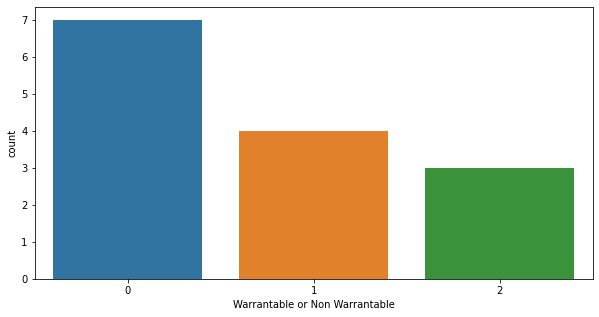

In [ ]:
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Warrantable or Non Warrantable', data = model)

print(data['Warrantable or Non Warrantable'].value_counts())

Warrantable or Non Warrantable
0    0.028571
1   -0.062500
2   -0.266667
Name: Polarity1, dtype: float64

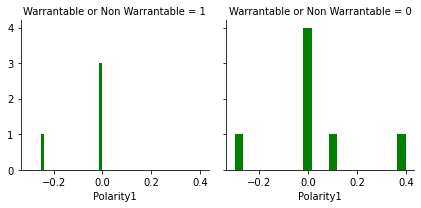

In [ ]:
# Visualising polarity between recommending and non-recommending customers, then getting value counts
g = sns.FacetGrid(model, col="Warrantable or Non Warrantable", col_order=[1, 0])
g = g.map(plt.hist, "Polarity1", bins=20, color="g")

recommend = model.groupby(['Warrantable or Non Warrantable'])
recommend['Polarity1'].mean()

Warrantable or Non Warrantable
0    0.021429
1   -0.062500
2   -0.266667
Name: Polarity 2, dtype: float64

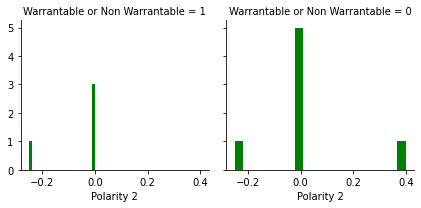

In [ ]:
# Visualising polarity between recommending and non-recommending customers, then getting value counts
g = sns.FacetGrid(model, col="Warrantable or Non Warrantable", col_order=[1, 0])
g = g.map(plt.hist, "Polarity 2", bins=20, color="g")

recommend = model.groupby(['Warrantable or Non Warrantable'])
recommend['Polarity 2'].mean()

Warrantable or Non Warrantable
0    0.025216
1   -0.020049
2   -0.033333
Name: Polarity 3, dtype: float64

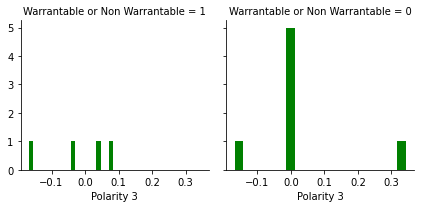

In [ ]:
# Visualising polarity between recommending and non-recommending customers, then getting value counts
g = sns.FacetGrid(model, col="Warrantable or Non Warrantable", col_order=[1, 0])
g = g.map(plt.hist, "Polarity 3", bins=20, color="g")

recommend = model.groupby(['Warrantable or Non Warrantable'])
recommend['Polarity 3'].mean()

Warrantable or Non Warrantable
0   -0.071429
1   -0.100000
2   -0.100000
Name: Polarity 4, dtype: float64

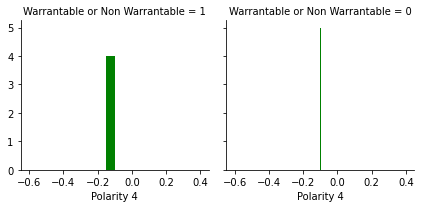

In [ ]:
# Visualising polarity between recommending and non-recommending customers, then getting value counts
g = sns.FacetGrid(model, col="Warrantable or Non Warrantable", col_order=[1, 0])
g = g.map(plt.hist, "Polarity 4", bins=20, color="g")

recommend = model.groupby(['Warrantable or Non Warrantable'])
recommend['Polarity 4'].mean()

In [ ]:
data.head(5)

,customer_query,employee_obs,Under Analysis,defect_tractor,identify_obs,Warrantable or Non Warrantable,Filtered customer_query,Filtered employee_obs,Filtered under analysis,Filtered defect_tractor,Filtered identify_obs,Polarity1,Polarity 2,Polarity 3,Polarity 4
0,feed pump is fouling with Hood,feed pump is fouling with Hood,The Feed Pump position is not changed with res...,Based on COE remarks Orc has been Closed,unknown,0,"[feed, pump, fouling, hood]","[feed, pump, fouling, hood]","[feed, pump, position, changed, respect, cover...","[based, coe, remark, orc, closed]",[unknown],0.0,0.00,0.000000,-0.1
1,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",Difficult to insert the scuttle in LH side due...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,As per COE comment hose length corrected in dr...,HOSE LENGTH CORRECTED IN DRAWING,0,"[yuv, nxt, export, tractor, build, aux, valve,...","[difficult, insert, scuttle, lh, wiring, harne...","[drawing, hose, length, d, model]","[coe, comment, hose, length, corrected, drwain...","[hose, length, corrected, drawing]",0.0,-0.25,0.000000,0.0
2,Oil leakage observed from brake drum drain plu...,Oil leakage Observed From Brake Drum Drain Plu...,"There is no change in brake drum,brake assly,d...",Based on COE Remarks Orc has been closed - Car...,unknown,1,"[oil, leakage, observed, brake, drum, drain, p...","[oil, leakage, observed, brake, drum, drain, p...","[change, brake, drumbrake, asslydrain, plugoil...","[based, coe, remark, orc, closed, carryover]",[unknown],0.0,0.00,0.084091,-0.1
3,Battery tray base plate found in bend conditio...,Battery tray base plate found in bend conditio...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,"Based on COE remarks , Orc has been Obsoleted",unknown,2,"[battery, tray, base, plate, bend, condition, ...","[battery, tray, base, plate, bend, condition, ...","[drawing, hose, length, d, model]","[based, coe, remark, orc, obsoleted]",[unknown],-0.8,-0.80,0.000000,-0.1
4,Y-NXT 28 HP 4WD TRACTOR OBSERVED MORE VIBRATIO...,ORC's seprated for Steering and fender aggrega...,Direction given by Gupta Sir to adopt Universa...,ORC's seprated for Steering and fender aggrega...,unknown,2,"[ynxt, hp, wd, tractor, observed, vibration, s...","[orcs, seprated, steering, fender, aggregate, ...","[direction, given, gupta, sir, adopt, universa...","[orcs, seprated, steering, fender, aggregate, ...",[unknown],0.0,0.00,0.000000,-0.1


In [ ]:
data.drop(['Filtered identify_obs', 'Polarity 4'], axis=1)

,customer_query,employee_obs,Under Analysis,defect_tractor,identify_obs,Warrantable or Non Warrantable,Filtered customer_query,Filtered employee_obs,Filtered under analysis,Filtered defect_tractor,Polarity1,Polarity 2,Polarity 3
0,feed pump is fouling with Hood,feed pump is fouling with Hood,The Feed Pump position is not changed with res...,Based on COE remarks Orc has been Closed,unknown,0,"[feed, pump, fouling, hood]","[feed, pump, fouling, hood]","[feed, pump, position, changed, respect, cover...","[based, coe, remark, orc, closed]",0.00,0.00,0.000000
1,"IN YUV NXT EXPORT TRACTOR BUILD, AUX VALVE HOS...",Difficult to insert the scuttle in LH side due...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,As per COE comment hose length corrected in dr...,HOSE LENGTH CORRECTED IN DRAWING,0,"[yuv, nxt, export, tractor, build, aux, valve,...","[difficult, insert, scuttle, lh, wiring, harne...","[drawing, hose, length, d, model]","[coe, comment, hose, length, corrected, drwain...",0.00,-0.25,0.000000
2,Oil leakage observed from brake drum drain plu...,Oil leakage Observed From Brake Drum Drain Plu...,"There is no change in brake drum,brake assly,d...",Based on COE Remarks Orc has been closed - Car...,unknown,1,"[oil, leakage, observed, brake, drum, drain, p...","[oil, leakage, observed, brake, drum, drain, p...","[change, brake, drumbrake, asslydrain, plugoil...","[based, coe, remark, orc, closed, carryover]",0.00,0.00,0.084091
3,Battery tray base plate found in bend conditio...,Battery tray base plate found in bend conditio...,IN DRAWING HOSE LENGTH WAS NOT AS PER 3D MODEL.,"Based on COE remarks , Orc has been Obsoleted",unknown,2,"[battery, tray, base, plate, bend, condition, ...","[battery, tray, base, plate, bend, condition, ...","[drawing, hose, length, d, model]","[based, coe, remark, orc, obsoleted]",-0.80,-0.80,0.000000
4,Y-NXT 28 HP 4WD TRACTOR OBSERVED MORE VIBRATIO...,ORC's seprated for Steering and fender aggrega...,Direction given by Gupta Sir to adopt Universa...,ORC's seprated for Steering and fender aggrega...,unknown,2,"[ynxt, hp, wd, tractor, observed, vibration, s...","[orcs, seprated, steering, fender, aggregate, ...","[direction, given, gupta, sir, adopt, universa...","[orcs, seprated, steering, fender, aggregate, ...",0.00,0.00,0.000000
5,TRANSMISSION OIL SEEPAGE OBSERVED FROM CLUTCH ...,Pls refer the attached photos - Oil seepage area,?\tCarry forwarded from current production tra...,unknown,unknown,1,"[transmission, oil, seepage, observed, clutch,...","[pls, refer, attached, photo, oil, seepage, area]","[carry, forwarded, current, production, tracto...",[unknown],0.00,0.00,-0.033333
6,Y-NXT 28 HP TRACTOR AIR CLEANER SECONDARY ELEM...,refer attached photo,There is no uneven shape or bulging on filter ...,unknown,unknown,0,"[ynxt, hp, tractor, air, cleaner, secondary, e...","[refer, attached, photo]","[uneven, shape, bulging, filter, element, bulg...",[unknown],-0.30,0.00,-0.166667
7,Radiator hose from thermostat to radiator inle...,Radiator hose from thermostat to radiator inle...,Issue is due to proto radiator assembly/hose. ...,Found ok in plant tractor.,unknown,0,"[radiator, hose, thermostat, radiator, inlet, ...","[radiator, hose, thermostat, radiator, inlet, ...","[issue, proto, radiator, assemblyhose, cad, la...","[ok, plant, tractor]",0.00,0.00,0.000000
8,Difficult to insert the scuttle in LH side due...,Difficult to insert the scuttle in LH side due...,There is no uneven shape or bulging on filter ...,"AAs Per COE & VA, drawing was updated and part...",unknown,1,"[difficult, insert, scuttle, lh, wiring, harne...","[difficult, insert, scuttle, lh, wiring, harne...","[uneven, shape, bulging, filter, element, bulg...","[aa, coe, va, drawing, updated, part, procurme...",-0.25,-0.25,-0.166667
9,"In ynxt 28 hp RC test tractor, during teardown...","In ynxt 28 hp RC test tractor, during teardown...",Thread loc to be added to avoid loosening.,Based on COE closure confirmation mail we are...,unknown,0,"[ynxt, hp

Largely similar, albeit a slight difference in ranking. The reviews are looking good for this retailer currently! Let's find out a little more about this by inspecting the chosen target variable.



Quick peak at the target variable



A binary variable 'Recommended' will be the focus of upcoming Machine Learning prediction. Let's see how the categories stack up:


There are nearly four times as many recommendations than there are non-recommendations. We'll need to keep a note of this as this could throw up a few issues when training algorithms - i'll touch on this in a little while.

You will recall that I pulled a Polarity statistic during Step 1; let's see how this shapes up per target outcome:

Comparing the above two graphs, it appears as though Polarity can recognise that reviews left by customers who recommended their product gave more positive reviews, compared to those who did not recommend. This bodes well for using our text matrix to predict recommendations.

With the weighted text matrix already created, there is no pressing need for any further preprocessing/engineering on these features. Therefore I will dive straight into Machine Learning.





4. Machine Learning


While a lot of the statistics that I created earlier on such as Polarity and Keyword are interesting, I want to focus model predictions purely on the weighted text matrix. So, anything that doesn't feature as part of this will now be removed from the DataFrame.

In [ ]:
#setup
# Get a list of columns for deletion
model.columns


Index(['customer_query', 'employee_obs', 'Under Analysis', 'defect_tractor',
       'identify_obs', 'Warrantable or Non Warrantable',
       'Filtered customer_query', 'Filtered employee_obs',
       'Filtered under analysis', 'Filtered defect_tractor',
       'Filtered identify_obs', 'Polarity1', 'Polarity 2', 'Polarity 3',
       'Polarity 4', 'changed', 'clamp', 'clamp design', 'corrected',
       'corrected drawing', 'design', 'design changed', 'drawing', 'hose',
       'hose length', 'length', 'length corrected', 'pipe', 'pipe routing',
       'routing', 'routing clamp', 'unknown', 'Keyword', 'Max', 'Sum'],
      dtype='object')

In [ ]:
# Drop all columns not part of the text matrix
ml_model = model.drop(['customer_query','employee_obs','Under Analysis','defect_tractor','identify_obs','Filtered customer_query','Filtered employee_obs','Filtered under analysis','Filtered defect_tractor','Filtered identify_obs','Polarity1','Polarity 2','Polarity 3','Polarity 4'], axis=1)

# Create X & y variables for Machine Learning
X = ml_model.drop('Warrantable or Non Warrantable', axis=1)
y = ml_model['Warrantable or Non Warrantable']

# Create a train-test split of these variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
 y_test

9     0
11    0
0     0
12    2
5     1
Name: Warrantable or Non Warrantable, dtype: int64

To help with Machine Learning I will define a function that will return the most prized statistics in one go. After initiating a model, this function will return an mean accuracy score following 5 folds of cross validation - this is to ensure that we are getting a smoothed out representation of both the training and test sets. Next this function will provide us with the Confusion Matrix; how many correct vs incorrect classifications have actually taken place within the given model? Last up, this function will churn out for us a Classification Report which details other important metrics such as Precision, Recall, the F1 score (which is just the harmonic mean of the former two), and support (which is the classification count).

Combined, these metrics will provide rich insight into individual model performance and will guide better selection towards the best performing model, and how best to optimise it.

In [ ]:
# Defining a function to fit and predict ML algorithms
def model(mod, model_name, x_train, y_train, x_test, y_test):
    mod.fit(x_train, y_train)
    print(model_name)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 5)
    predictions = cross_val_predict(mod, X_train, y_train, cv = 5)
    print("Accuracy:", round(acc.mean(),3))
    cm = confusion_matrix(predictions, y_train)
    print("Confusion Matrix:  \n", cm)
    print("                    Classification Report \n",classification_report(predictions, y_train))

Function defined - now let's get training! I'm only going to focus on four algorithms in this kernel, starting off with:




# 1. Gaussian Naive Bayes

In [ ]:
# 1. Gaussian Naive Bayes
gnb = GaussianNB()
model(gnb, "Gaussian Naive Bayes", X_train, y_train, X_test, y_test)


ValueError: ignored

# 2. Random Forest Classifier

In [ ]:
ran = RandomForestClassifier(n_estimators=50)
model(ran, "Random Forest Classifier", X_train, y_train, X_test, y_test)

# 3. Logistic Regression

In [ ]:
log = LogisticRegression()
model(log, "Logistic Regression", X_train, y_train, X_test, y_test)

# 4. Linear SVC

In [ ]:
svc = LinearSVC()
model(svc, "Linear SVC", X_train, y_train, X_test, y_test)

Four models down, and we're up to 88% Accuracy with the Linear SVC. However, there seems to be an issue with Class 0 (would not recommend) across all trained models; looking at the LinearSVC both Precision & Recall are low, contributing towards a mediocre 0.60 F1 score.

My sense is this is due to class imbalance. As depicted earlier, there are around five times fewer 0 classifications compared to 1 classifications, which can sometimes be problematic within Machine Learning, whereby modelling generally tends to work better when there is an almost equal numbers of samples from each class in the target variable. With this dataset, we're way off that.

To overcome this problem, we can either DownSample the majority Class or UpSample the minority class. In this notebook I will use an Oversampling technique from the handy SMOTE library. Let's apply this technique and then re-run all four models to re-assess precision & recall performance.

In [ ]:
# ALGORITHM ROUND 2
# Import the hopeful solution to our problems
from imblearn.over_sampling import SMOTE
smote=SMOTE()


In [ ]:
y

In [ ]:
# Setting up new variables for ML
X_sm, y_sm = smote.fit_sample(X,y)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [ ]:
# Defining a new function with revised inputs for the new SMOTE variables
def model_sm(mod, model_name, x_train_sm, y_train_sm, x_test_sm, y_test_sm):
    mod.fit(x_train_sm, y_train_sm)
    print(model_name)
    acc = cross_val_score(mod, X_train_sm, y_train_sm, scoring = "accuracy", cv = 5)
    predictions = cross_val_predict(mod, X_train_sm, y_train_sm, cv = 5)
    print("Accuracy:", round(acc.mean(),3))
    cm = confusion_matrix(predictions, y_train_sm)
    print("Confusion Matrix:  \n", cm)
    print("Classification Report \n",classification_report(predictions, y_train_sm))

# 1. Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
model_sm(gnb, "Gaussian Naive Bayes", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

# 2. Random Forest Classifier



In [ ]:
ran = RandomForestClassifier(n_estimators=50)
model_sm(ran, "Random Forest Classifier", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

# 3. Logistic Regression

In [ ]:
log = LogisticRegression()
model_sm(log, "Logistic Regression", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

# 4. Linear SVC

In [ ]:
svc = LinearSVC()
model_sm(svc, "Linear SVC", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

We're in business; a drastic improvement on Precision & Recall across all algorithms, even complemented with improved overall acccuracy on a couple as well. It's great to see the Naive Bayes Classifier now up at 85%, as this algorithm is typically well suited to crunching text data. However now exceeding the 90% bracket is the Random Forest Classifier, also boasting great Precision & Recall values too.





5.BEST MODEL:RANDOM FOREST CLASSIFIER


Given that the Random Forest now heads the pack in terms of accuracy, let's proceed with some further exploration and perhaps a spot of optimisation too. I'll begin with visualising the top predictive features from the Random Forest Classifier:


ASSESSING FEATURE IMPORTANCE




In [ ]:
# Creating a plot for feature importance
def importance_plotting(data,x,y,palette,title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data,y_vars=y,x_vars=x,size=5,aspect=1)
    ft.map(sns.stripplot,orient='h',palette=palette, edgecolor="black",size=15)
    for ax, title in zip(ft.axes.flat, titles):
        
    # Set a different title for each axes
        ax.set(title=title)
        
    # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

    plt.show()

In [ ]:
# Compile arrays of columns (words) and feature importances
fi = {'Words':ml_model.drop('Recommend',axis=1).columns.tolist(),'Importance':ran.feature_importances_}

# Bung these into a dataframe, rank highest to lowest then slice top 20
Importance = pd.DataFrame(fi,index=None).sort_values('Importance',ascending=False).head(25)

# Plot the graph!
titles = ["Top 25 most important words in predicting product recommendation"]
importance_plotting(Importance,'Importance','Words','Greens_r',titles)

Taking the win by a clear margin as the strongest predictor of product recommendation is the word 'love'. This shouldn't come as too much of a surprise given that 'love' is a highly emotive word that conveys a larger feeling of positivity, as opposed to 'like' or 'nice', for example. Not just positive words but also negative ones such as 'disappointed' and 'unfortunately' have been useful in the prediction.

Of particular interest to a retailer might be words such as:

Soft / Comfortable: Revealing the importance of texture, and how the clothes actually feel
Fit / Size: Both similar in nature and high ranking, the product needs to fit well.
Cheap: This word features in the top list, but quite far down the list! How important is price when reviewing a product at this retailer?




PRWCISSION-RECALL CURVE


For each person the Random Forest algorithm classifies, it computes a probability based on a function and it classifies the review as 'Recommended' (when the score is bigger than the threshold) or as 'Not Recommended' (when the score is smaller than the threshold). This information can be displayed visually as a 'Presicion-Recall curve', which has usefulness in allowing us to tailor n algorithm to more exact precision and recall requirements. The below code will generate this for us:

In [ ]:
# Getting prediction probabilities
y_scores = ran.predict_proba(X_train_sm)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train_sm, y_scores)

In [ ]:
# Defining a new function to plot the precision-recall curve
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

The optimum Precision/Recall threshold here looks within the region of 0.7, thereafter Recall plummets eventually down to near zero.



**ROC-AUC CURVE**



AUC is a metric for binary classification.

Accuracy deals with ones and zeros, meaning you either got the class label right or you didn’t. But many classifiers are able to quantify their uncertainty about the answer by outputting a probability value. To compute accuracy from probabilities you need a threshold to decide when zero turns into one. The most natural threshold is of course 0.5.

Let’s suppose you have a quirky classifier. It is able to get all the answers right, but it outputs 0.7 for negative examples and 0.9 for positive examples. Clearly, a threshold of 0.5 won’t get you far, but 0.8 would be just perfect.

That’s the whole point of using AUC - it considers all possible thresholds. Various thresholds result in different true positive/false positive rates. As you decrease the threshold, you get more true positives, but also more false positives. The relation between them can be plotted:

In [ ]:
# Compute the true positive and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_sm, y_scores)

In [ ]:
# Plotting the true positive and false positive rate
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line represents a purely random classifier (e.g a coin flip), so the aim is for our classifier (represented by the blue ROC curve) to be as far away from it as possible. This space under the curve is known as the AUC, and therefore a larger AUC space is indicative of a better model. For this Random Forest Classifier model, the graph therefore indicates very strong model performance (hoo-rah)!





ROC-AUC SCORE




Lastly, we will compute the size of this AUC space, known as the ROC-AUC score.


In [ ]:
# Computing the ROC-AUC score
r_a_score = roc_auc_score(y_train_sm, y_scores)
print("ROC-AUC-Score:", r_a_score)

Backing up the graph, a very strong ROC-AUC Score of over 99% has been achieved by this model.




**6.CONCLUSION**


Job done! In this kernel we have:

Started with an unstructured table of 23,000 clothing text reviews and corresponding Recommend vs Not Recommend classifications.
Taken the text reviews, cleaned them and built them into a matrix
Briefly explored the data before applying initial Machine Learning Algorithms
Balanced the unvenly weighted target variables before re-running the same Algorithms with improved findings
Identified the best performing model (Random Forest Classifier), explored it's most important features and computed further Precision/Recall metrics (including ROC-AUC).
Achieved a final accuracy score above 90% on the model's training dataset, and an ROC-AUC score above 99%.
I've enjoyed working with this dataset and have learned heaps around using text data to predict an outcome - given this has been my first exposure to working with text, the buzz in being able to do just this has been great! It has also been an enjoyable experience using this data to predict genuinely meaningful and useful insights, such as knowing what consumers are looking for in a clothing product, and what matters most to them.

In terms of how this kernel could be extended or improved, we could:

Take a more rigorous approach to mining the text data, such as categorising products, controlling for spelling errors / using more advanced modelling techniques such as topic modelling
Make better use of the Polarity metric within Machine Learning
Apply a more extensive list of algorithms (including Deep Learning) to the text data
Apply GridSearchCV or RandomisedSearchCV to optimise the final model
Create an ensemble of models for better prediction
Perhaps I will return to some or all of these points at a later date :). For now however, thank you for reading this kernel! Please do feel free to share with me your thoughts, feedback and any suggestions for improvement - I am always willing to learn new or more efficient techniques! Cheers.




